## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import eli5
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 
pd.pandas.set_option("display.max_columns", None)
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("Data/Train.csv")
test = pd.read_csv("Data/Test.csv")
# test2 used for child_id column when generating predictions
test2 = pd.read_csv('Data/Test.csv')
ss = pd.read_csv('Data/SampleSubmission.csv')

In [3]:
train.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_gender,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pra_gender,pra_experience,pra_class_present,pra_date,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_class_size_large,pra_cohort,pra_cohort_0,pra_cohort_1,pra_cohort_2,pra_cohort_3,pra_cohort_4,pra_cohort_5,pra_cohort_6,pra_class_language,pra_plan_4yrs,pra_plan_4yrs_1,pra_plan_4yrs_2,pra_plan_4yrs_3,pra_plan_4yrs_4,pra_plan_4yrs_97,pra_plan_ncf,pra_plan_5yrs,pra_plan_5yrs_1,pra_plan_5yrs_2,pra_plan_5yrs_3,pra_plan_5yrs_4,pra_plan_5yrs_5,pra_plan_5yrs_97,pra_plan_approved,pra_plan_4yrsother,pra_plan_5yrsother,pra_job,pra_clearance_police,pra_clearance_ncp,pra_salary,pra_paid,pra_breadwinner,pra_hhsize,pra_education,pra_qualification,pra_qualification_1,pra_qualification_2,pra_qualification_3,pra_qualification_4,pra_qualification_5,pra_qualification_6,pra_qualification_7,pra_qualification_97,pra_qualification_0,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_training,pra_ncf_trainer,pra_ncf_trainer_1,pra_ncf_trainer_2,pra_ncf_trainer_3,pra_ncf_trainer_4,pra_ncf_trainer_5,pra_ncf_trainer_97,pra_ncf_trainerother,pra_learnership,pra_training,pra_training_1,pra_training_2,pra_training_3,pra_training_4,pra_training_5,pra_training_6,pra_training_0,pra_special_training,pra_special_referrals,pra_online_training,pra_online_training_details,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pra_class_space_small,pra_class_space_large,pra_ind,pra_language,pri_mobile,pri_school,pri_holidays,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_calc_time_open,pri_calc_time_close,pri_year,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_3,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_languageother,pri_toys,pri_aftercare,pri_fees,pri_fees_amount,pri_fees_free,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_bank,pri_transport,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_partial,pri_registered_programme,pri_registered_npo,pri_registered_dsd,pri_subsidy,pri_network,pri_dsd_year,pri_capacity,pri_reason_register_year,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_6,pri_funding_7,pri_funding_donations,pri_funding_97,pri_attendance,pri_fees_except

In [4]:
X = train.drop(['target','child_id'], axis=1)
test = test.drop(['child_id'], axis=1)
Y = train.target

In [5]:
print(X.shape, Y.shape)

(8585, 677) (8585,)


In [6]:
#Getting distributions of different variable types
numerical_vars = [col for col in X.columns if X[col].dtype != 'object']
categorical_vars = [col for col in X.columns if X[col].dtype == 'object']

In [7]:
print(len(numerical_vars), len(categorical_vars))

159 518


Breaking down the categorical variables into their unique value counts

In [8]:
categorical_unique_value_counts = []
for i in categorical_vars:
    categorical_unique_value_counts.append(len(X[i].unique()))

In [9]:
list(range(len(categorical_unique_value_counts)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

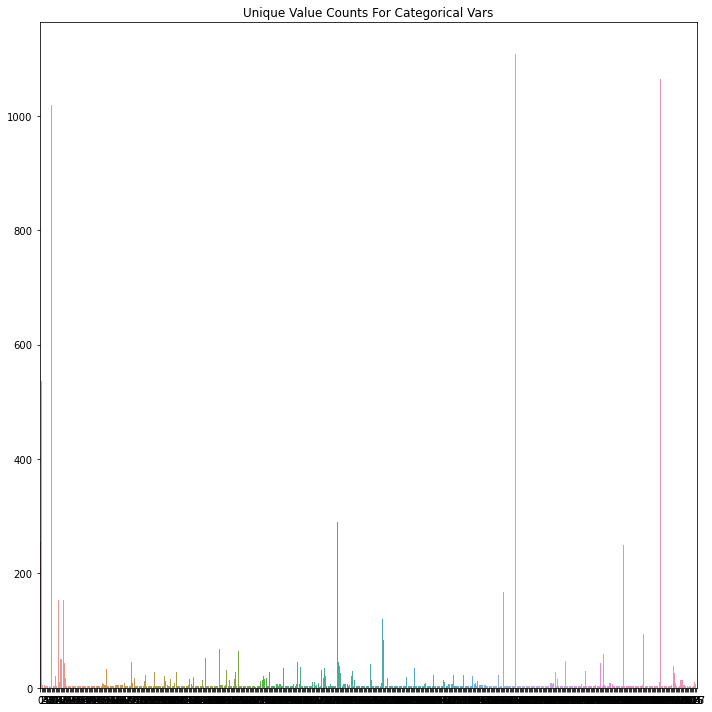

In [10]:
categorical_unique_value_counts
plt.figure(figsize=(10,10))
sns.barplot(x=list(range(len(categorical_unique_value_counts))), y = categorical_unique_value_counts)
plt.title('Unique Value Counts For Categorical Vars')
plt.tight_layout()
plt.show()


Seperating categorical values into high and low cardinal features as well as binary features

In [11]:
high_cardinal = []
low_cardinal = []
binary_cat = []
for index, i in enumerate(categorical_unique_value_counts):
    if i==3:
        binary_cat.append(categorical_vars[index])
    if i>50:
        high_cardinal.append(categorical_vars[index])
    else:
        low_cardinal.append(categorical_vars[index])
      

Plotting the distribution of types of categorical values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Counts')

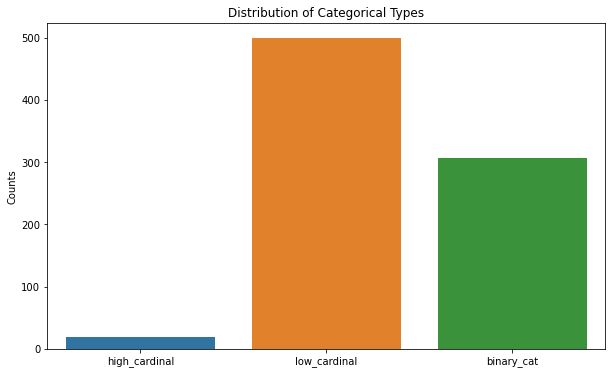

In [12]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Categorical Types")
sns.barplot(x=["high_cardinal","low_cardinal", "binary_cat"], y=[len(high_cardinal), len(low_cardinal), len(binary_cat)])
plt.ylabel("Counts")

### Converting to function for future use

In [13]:
def categorical_grouper(df):
    high_cardinal = []
    low_cardinal = []
    binary_cat = []
    categorical_vars = [col for col in df.columns if df[col].dtype == 'object']
    categorical_unique_value_counts = []
    for i in categorical_vars:
        categorical_unique_value_counts.append(len(df[i].unique()))
    for index, i in enumerate(categorical_unique_value_counts):
        if i==3:
            binary_cat.append(categorical_vars[index])
        if i>50:
            high_cardinal.append(categorical_vars[index])
        else:
            low_cardinal.append(categorical_vars[index])

    plt.figure(figsize=(10,6))
    plt.title("Distribution of Categorical Types")
    sns.barplot(x=["high_cardinal","low_cardinal", "binary_cat"], y=[len(high_cardinal), len(low_cardinal), len(binary_cat)])
    plt.ylabel("Counts")
    plt.show()
    
    return list(high_cardinal), list(low_cardinal), list(binary_cat)

In [14]:
def categorical_grouper_without_plot(df):
    high_cardinal = []
    low_cardinal = []
    binary_cat = []
    categorical_vars = [col for col in df.columns if df[col].dtype == 'object']
    categorical_unique_value_counts = []
    for i in categorical_vars:
        categorical_unique_value_counts.append(len(df[i].unique()))
    for index, i in enumerate(categorical_unique_value_counts):
        if i==3:
            binary_cat.append(categorical_vars[index])
        if i>50:
            high_cardinal.append(categorical_vars[index])
        else:
            low_cardinal.append(categorical_vars[index])
    return list(high_cardinal), list(low_cardinal), list(binary_cat)

## Fixing the binary categorical values

In [15]:
yes_no_cat_vars = []
for i in binary_cat:
    if 'Yes' in X[i].unique():
        yes_no_cat_vars.append(i)

Fixing the yes and no categorical variables

In [16]:
X[yes_no_cat_vars].shape

(8585, 295)

In [17]:
for i in yes_no_cat_vars:
    X[i] = X[i].map({"No":0, "Yes":1})
    test[i] = test[i].map({"No":0, "Yes":1})

---

Remaining categorical vars

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

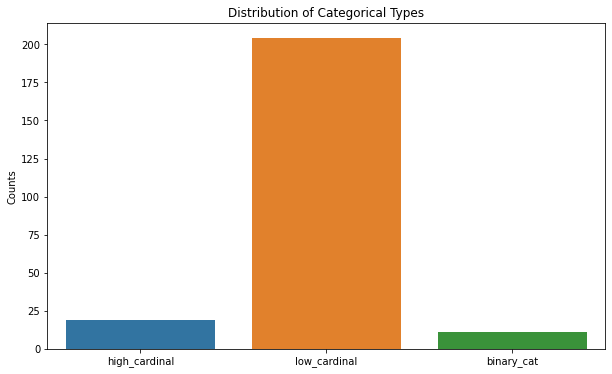

In [18]:
high_card, low_card, bin_cat = categorical_grouper(X)

Fixing the pra_gender column. Use 1 hot encoding.

In [19]:
test[bin_cat].head()

,pra_gender,pri_mobile,pri_languageother,pri_clinic_travelother,teacher_social_met,teacher_emotional_met,teacher_selfcare_met,obs_shared,urban,positionother,positionotherreason
0,NaN,Based at a specific location,NaN,NaN,Meets the standard,Meets the standard,Meets the standard,Only this ECD programme,Urban,NaN,NaN
1,NaN,Based at a specific location,NaN,NaN,Meets the standard,Meets the standard,Meets the standard,Only this ECD programme,Urban,NaN,NaN
2,NaN,Based at a specific location,NaN,NaN,Does not meet standard,Does not meet standard,NaN,Other activities as well,Rural,NaN,NaN
3,NaN,Based at a specific location,NaN,NaN,Meets the standard,Meets the standard,Meets the standard,Only this ECD programme,Urban,NaN,NaN
4,NaN,Based at a specific location,NaN,NaN,Does not meet standard,Does not meet standard,Does not meet standard,Only this ECD programme,Urban,NaN,NaN


## OneHotEncoding gender columns

In [20]:
#Looking at distribution counts of genders. Data is skewed toward female, although mean score between males and females are not
#too different
print(X["pra_gender"].value_counts())
print(train[X["pra_gender"]=="Male"].target.mean(), train[X["pra_gender"]=="Female"].target.mean())

Female    1603
Male        26
Name: pra_gender, dtype: int64
41.59653821358314 44.78500934667462


In [21]:
from sklearn.preprocessing import OneHotEncoder
def oneHotColEncoder(colnamelist, traindf, testdf):
    for i in colnamelist:
        OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
        OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(traindf[[i]]), columns=OH_encoder.get_feature_names([i]))
        OH_cols_valid = pd.DataFrame(OH_encoder.fit_transform(testdf[[i]]),columns=OH_encoder.get_feature_names([i]))
        # Remove categorical columns (will replace with one-hot encoding)
        traindf = traindf.drop(i, axis=1)
        testdf = testdf.drop(i, axis=1)
        # Add one-hot encoded columns to numerical features
        traindf = pd.concat([traindf, OH_cols_train], axis="columns")
        testdf = pd.concat([testdf, OH_cols_valid], axis="columns")
    return traindf, testdf

In [22]:
X, test = oneHotColEncoder(['pra_gender', 'child_gender'], X, test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

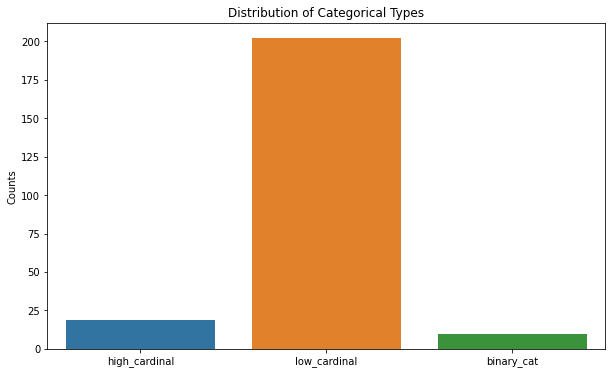

In [23]:
high_card, low_card, bin_cat = categorical_grouper(X)

In [24]:
X.head()

,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pra_experience,pra_class_present,pra_date,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_class_size_large,pra_cohort,pra_cohort_0,pra_cohort_1,pra_cohort_2,pra_cohort_3,pra_cohort_4,pra_cohort_5,pra_cohort_6,pra_class_language,pra_plan_4yrs,pra_plan_4yrs_1,pra_plan_4yrs_2,pra_plan_4yrs_3,pra_plan_4yrs_4,pra_plan_4yrs_97,pra_plan_ncf,pra_plan_5yrs,pra_plan_5yrs_1,pra_plan_5yrs_2,pra_plan_5yrs_3,pra_plan_5yrs_4,pra_plan_5yrs_5,pra_plan_5yrs_97,pra_plan_approved,pra_plan_4yrsother,pra_plan_5yrsother,pra_job,pra_clearance_police,pra_clearance_ncp,pra_salary,pra_paid,pra_breadwinner,pra_hhsize,pra_education,pra_qualification,pra_qualification_1,pra_qualification_2,pra_qualification_3,pra_qualification_4,pra_qualification_5,pra_qualification_6,pra_qualification_7,pra_qualification_97,pra_qualification_0,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_training,pra_ncf_trainer,pra_ncf_trainer_1,pra_ncf_trainer_2,pra_ncf_trainer_3,pra_ncf_trainer_4,pra_ncf_trainer_5,pra_ncf_trainer_97,pra_ncf_trainerother,pra_learnership,pra_training,pra_training_1,pra_training_2,pra_training_3,pra_training_4,pra_training_5,pra_training_6,pra_training_0,pra_special_training,pra_special_referrals,pra_online_training,pra_online_training_details,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pra_class_space_small,pra_class_space_large,pra_ind,pra_language,pri_mobile,pri_school,pri_holidays,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_calc_time_open,pri_calc_time_close,pri_year,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_3,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_languageother,pri_toys,pri_aftercare,pri_fees,pri_fees_amount,pri_fees_free,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_bank,pri_transport,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_partial,pri_registered_programme,pri_registered_npo,pri_registered_dsd,pri_subsidy,pri_network,pri_dsd_year,pri_capacity,pri_reason_register_year,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_6,pri_funding_7,pri_funding_donations,pri_funding_97,pri_attendance,pri_fees_exceptions,pri_fees_paid_proportion,pri

## Ordinal encoding

Ordinal Encoding low cardinal variables with custom ordinal encoder

In [25]:
list_ordinal_reversed = ["child_observe_attentive", "child_observe_concentrated", "child_observe_diligent", "child_observe_interested","child_stunted",'pra_engaged', "pra_agency_choice","pra_agency_explore","pra_agency_questions","pra_agency_understand", "pra_agency_play","pra_agency_learn","pra_agency_order","pra_job", "pri_bank","pri_kitchen","teacher_social_peers","teacher_social_nonaggressive","teacher_social_cooperate","teacher_social_assistance","teacher_emotional_understand","teacher_selfcare_met", "obs_shared","grade_r","certificate_registration_partial","certificate_registration_program","certificate_registration_npo","certificate_register","urban"]

In [26]:
list_ordinal_normal = ["child_grant", "pri_registered_partial", "pri_registered_programme", "pri_registered_dsd", "teacher_social_ideas", "teacher_social_initiative", "teacher_social_met","teacher_emotional_met"]

In [27]:
#Mapping all the ordinal values based on their range
unique_var_dict = {}
for i in X.columns:
    if X[i].dtype == "O":
        final_list = list(X[i].unique())
        cleanedList = [x for x in final_list if str(x) != 'nan']
        unique_var_dict.update({i:cleanedList})

def ordinal_value_mapper(column, ls, train, test):
    mapping_dictionary_value = {k: v for v, k in enumerate(ls)}
    train[column]=train[column].map(mapping_dictionary_value)
    test[column]=test[column].map(mapping_dictionary_value)
for ele in list_ordinal_reversed:
    ordinal_value_mapper(ele,list(reversed(unique_var_dict[ele])), X, test)
for ele in list_ordinal_normal:
    ordinal_value_mapper(ele,unique_var_dict[ele], X, test)

In [28]:
high_card, low_card, bin_cat = categorical_grouper_without_plot(X)
X[low_card].head()

,child_years_in_programme,child_languages,child_age_group,prov_best,pqa_date,pqa_class_age,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_assessment_observation,pqa_assessment_systematic,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_plans,pra_date,pra_class_size_large,pra_cohort,pra_class_language,pra_plan_4yrs,pra_plan_5yrs,pra_plan_4yrsother,pra_plan_5yrsother,pra_salary,pra_education,pra_qualification,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_trainer,pra_ncf_trainerother,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_class_space_small,pra_class_space_large,pra_language,pri_mobile,pri_calc_time_open,pri_calc_time_close,pri_separate,pri_languageother,pri_toys,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_meal,pri_reason_register_year,pri_attendance,pri_fees_paid_proportion,pri_date,pri_education,pri_qualification,pri_qualificationother,pri_founder,pri_founderother,pri_same_language,pri_location,pri_locationother,pri_dsd_conditional,pri_dsd_conditional_other,pri_dsd_unregistered,pri_dsd_unregistered_other,pri_network_type,pri_email_network_forum,pri_name_network_ngo,pri_name_network_alliance,pri_name_network_other,pri_support_dsd,pri_support_dbe,pri_support_municipality,pri_support_ngo,pri_staff_employed,pri_staff_changes_reasons,pri_staff_changes_reasonsother,pri_covid_staff_salaries,pri_money,pri_moneyother,pri_funding_salary,pri_funding_salaryother,pri_clinic_travel,pri_clinic_travelother,pri_covid_awareness,pri_covid_precautions,pri_covid_awareness_other,pri_covid_precautions_other,pri_food_parents_breakfast,pri_food_parents_morning,pri_food_parents_lunch,pri_food_parents_afternoon,pri_food_type,pri_food_donor,pri_food_donorother,pri_meal_prep,pri_parents_frequency,pri_parents_contact,pri_parents_activities,pri_records,pri_support_provider,pri_support_providerother,pri_support_frequency,pri_internet_user,pri_languages,teacher_emotional_appropriate,teacher_emotional_independent,teacher_emotional_adjust,teacher_emotional_confidence,teacher_emotional_selfstarter,hle_ecd_other,hle_ind,obs_materialsother,obs_heating_census,obs_lighting_census,obs_cooking_census,obs_water,obs_waterother,obs_handwashing,obs_toilet,obs_building,obs_equipment,obs_condition_equipment,obs_date,obs_handwashingother,obs_heating,obs_lighting,obs_cooking,obs_material_display,id_prov,phase_natemis,obs_access_disability,health,healthother,other_practitioner,plan,language_child,language_assessment,facility_type,sanitation_learners,positionother,positionotherreason,sef_ind,pre_covid,language_assessment_w2,ses_cat
0,NaN,NaN,50-59 months,GAUTENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GT,NaN,NaN,NaN,NaN,NaN,NaN,Sesotho,Sesotho,Grade R,NaN,NaN,NaN,Yes,Post COVID,NaN,NaN
1,1st year in the programme,NaN,60-69 months,KWAZULU-NATAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [29]:
def dfMapper(column, mapping_dictionary_value):
    X[column]=X[column].map(mapping_dictionary_value)
    test[column]=test[column].map(mapping_dictionary_value)

In [30]:
X["child_years_in_programme"].unique()

array([nan, '1st year in the programme', '2nd year in programme',
       '3rd year in programme', 'Do Not Know'], dtype=object)

In [31]:
#Converting to nueric based on year stored in first index
def child_years_in_programe_categorizer(row):
    if str(row)[0] == 'n':
        return np.nan
    if str(row)[0] == 'D':
        return np.nan
    else:
        return int(str(row)[0])
#X["child_years_in_programme"] = X["child_years_in_programme"].apply(child_years_in_programe_categorizer)
#test["child_years_in_programme"] = test["child_years_in_programme"].apply(child_years_in_programe_categorizer)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

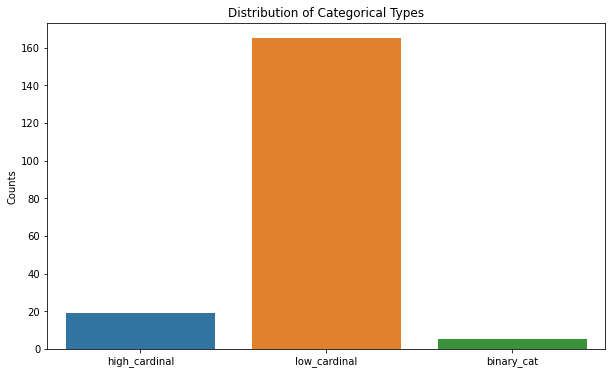

In [32]:
high_card, low_card, bin_cat = categorical_grouper(X)

In [33]:
X.head()

,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pra_experience,pra_class_present,pra_date,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_class_size_large,pra_cohort,pra_cohort_0,pra_cohort_1,pra_cohort_2,pra_cohort_3,pra_cohort_4,pra_cohort_5,pra_cohort_6,pra_class_language,pra_plan_4yrs,pra_plan_4yrs_1,pra_plan_4yrs_2,pra_plan_4yrs_3,pra_plan_4yrs_4,pra_plan_4yrs_97,pra_plan_ncf,pra_plan_5yrs,pra_plan_5yrs_1,pra_plan_5yrs_2,pra_plan_5yrs_3,pra_plan_5yrs_4,pra_plan_5yrs_5,pra_plan_5yrs_97,pra_plan_approved,pra_plan_4yrsother,pra_plan_5yrsother,pra_job,pra_clearance_police,pra_clearance_ncp,pra_salary,pra_paid,pra_breadwinner,pra_hhsize,pra_education,pra_qualification,pra_qualification_1,pra_qualification_2,pra_qualification_3,pra_qualification_4,pra_qualification_5,pra_qualification_6,pra_qualification_7,pra_qualification_97,pra_qualification_0,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_training,pra_ncf_trainer,pra_ncf_trainer_1,pra_ncf_trainer_2,pra_ncf_trainer_3,pra_ncf_trainer_4,pra_ncf_trainer_5,pra_ncf_trainer_97,pra_ncf_trainerother,pra_learnership,pra_training,pra_training_1,pra_training_2,pra_training_3,pra_training_4,pra_training_5,pra_training_6,pra_training_0,pra_special_training,pra_special_referrals,pra_online_training,pra_online_training_details,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pra_class_space_small,pra_class_space_large,pra_ind,pra_language,pri_mobile,pri_school,pri_holidays,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_calc_time_open,pri_calc_time_close,pri_year,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_3,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_languageother,pri_toys,pri_aftercare,pri_fees,pri_fees_amount,pri_fees_free,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_bank,pri_transport,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_partial,pri_registered_programme,pri_registered_npo,pri_registered_dsd,pri_subsidy,pri_network,pri_dsd_year,pri_capacity,pri_reason_register_year,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_6,pri_funding_7,pri_funding_donations,pri_funding_97,pri_attendance,pri_fees_exceptions,pri_fees_paid_proportion,pri

In [34]:
high_cardinal_target_cols = ["dc_best", "mn_best", "id_mn_best", "id_dc_best","prov_best", "id_dc_best","pra_class_language","pra_education","pra_previous","pra_language","pri_facilities","pri_land","pri_education","pri_location","pri_name_network_forum", "pri_expenseother","obs_heating_census","obs_lighting_census","obs_cooking_census","obs_water","obs_building","id_prov","phase_natemis","language_child","language_assessment","facility_type","sef_ind","pre_covid"]

## Using target encoding for high cardinality features

In [35]:
def MyEstimateEncoder(column_name, X, Y, test):
    X_encode = X.sample(frac=0.25)
    y_encode = Y[X_encode.index]
    X_pretrain = X.drop(X_encode.index)
    y_train = Y[X_pretrain.index]
    from category_encoders import MEstimateEncoder

    encoder = MEstimateEncoder(cols=column_name, m=5.0)
    encoder.fit(X_encode, y_encode)

    X = encoder.transform(X)
    test = encoder.transform(test)
    return X, test

In [36]:
for i in high_cardinal_target_cols:
    X, test = MyEstimateEncoder(i, X, Y, test)

In [37]:
X[high_cardinal_target_cols]

,dc_best,mn_best,id_mn_best,id_dc_best,prov_best,id_dc_best,pra_class_language,pra_education,pra_previous,pra_language,pri_facilities,pri_land,pri_education,pri_location,pri_name_network_forum,pri_expenseother,obs_heating_census,obs_lighting_census,obs_cooking_census,obs_water,obs_building,id_prov,phase_natemis,language_child,language_assessment,facility_type,sef_ind,pre_covid
0,51.039271,51.816832,54.300330,54.511676,48.485946,54.511676,49.615501,49.637679,49.697839,49.729832,53.613797,54.269883,49.429460,49.212053,49.158210,48.779327,50.948404,50.286291,50.308507,52.349287,53.326513,48.032761,52.190387,43.603501,44.090795,55.850092,48.172870,47.726744
1,51.772086,52.123446,51.281552,53.132303,48.083303,53.132303,49.615501,49.637679,49.697839,49.729832,53.613797,54.269883,49.429460,49.212053,49.158210,48.779327,50.948404,50.286291,50.308507,52.349287,53.326513,49.003399,52.190387,49.034626,47.633835,48.391882,48.172870,56.673159
2,54.534818,53.697411,55.507129,55.098529,54.322570,55.098529,49.615501,49.637679,49.697839,49.729832,53.613797,54.269883,49.429460,49.212053,49.158210,48.779327,50.948404,50.286291,50.308507,47.720416,53.326513,53.708553,52.190387,51.037681,51.463074,55.850092,51.139888,47.726744
3,55.069743,58.070072,51.487772,54.362559,54.322570,54.362559,49.615501,49.637679,49.697839,49.729832,50.152058,45.491465,49.429460,49.212053,49.158210,48.779327,46.196576,46.358929,45.846912,44.995708,44.879673,53.708553,46.556178,49.254337,50.637280,48.391882,48.172870,47.726744
4,53.558636,44.442442,45.810550,48.927665,48.083303,48.927665,42.689319,43.543845,44.795927,44.522728,46.821614,45.499141,44.131038,43.190151,48.538308,48.534198,50.948404,50.286291,50.308507,43.421233,45.901079,49.003399,44.673017,49.034626,47.633835,48.391882,48.172870,47.726744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,42.908820,42.505071,46.858326,44.540424,42.086816,44.540424,40.764844,43.543845,42.597734,39.828315,44.108050,45.296340,45.008789,43.190151,46.282629,48.779327,50.948404,50.286291,50.308507,47.720416,45.901079,40.629404,44.673017,43.603501,44.090795,48.391882,48.172870,47.726744
8581,52.789548,50.216546,49.568660,50.929622,49.608140,50.929622,46.054782,43.543845,45.189100,44.985748,44.108050,45.084164,45.008789,44.991898,49.158210,44.416312,50.948404,50.286291,50.308507,47.720416,45.901079,47.538380,44.673017,46.223155,44.947919,48.391882,48.172870,47.726744
8582,45.476590,44.622607,48.335707,45.393214,43.327590,45.393214,51.208921,43.430341,45.189100,48.806175,43.869991,45.491465,44.211534,50.820644,49.158210,48.779327,50.948404,50.286291,50.308507,47.720416,45.901079,43.091004,44.673017,53.741254,54.727759,48.391882,48.172870,47.726744
8583,47.255120,49.729544,50.382873,51.893994,48.485946,51.893994,49.615501,49.637679,49.697839,49.729832,46.821614,47.163993,49.429460,49.212053,49.158210,48.779327,50.948404,50.286291,50.308507,52.349287,53.326513,48.032761,44.673017,49.254337,50.637280,48.391882,48.172870,47.726744


<IPython.core.display.Javascript object>

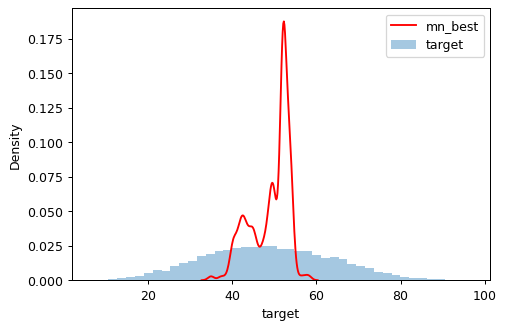

In [38]:
plt.figure(dpi=90)
ax = sns.distplot(Y, kde=False, norm_hist=True)
ax = sns.kdeplot(X["mn_best"], color='r', ax=ax)
ax.set_xlabel("target")
ax.legend(labels=["mn_best", 'target']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

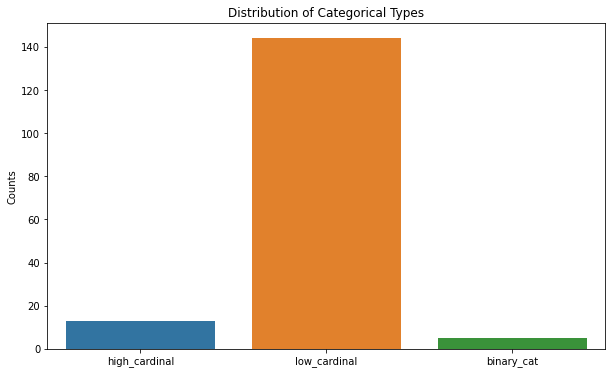

In [39]:
high_card, low_card, bin_cat = categorical_grouper(X)

In [40]:
X.head()

,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pra_experience,pra_class_present,pra_date,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_class_size_large,pra_cohort,pra_cohort_0,pra_cohort_1,pra_cohort_2,pra_cohort_3,pra_cohort_4,pra_cohort_5,pra_cohort_6,pra_class_language,pra_plan_4yrs,pra_plan_4yrs_1,pra_plan_4yrs_2,pra_plan_4yrs_3,pra_plan_4yrs_4,pra_plan_4yrs_97,pra_plan_ncf,pra_plan_5yrs,pra_plan_5yrs_1,pra_plan_5yrs_2,pra_plan_5yrs_3,pra_plan_5yrs_4,pra_plan_5yrs_5,pra_plan_5yrs_97,pra_plan_approved,pra_plan_4yrsother,pra_plan_5yrsother,pra_job,pra_clearance_police,pra_clearance_ncp,pra_salary,pra_paid,pra_breadwinner,pra_hhsize,pra_education,pra_qualification,pra_qualification_1,pra_qualification_2,pra_qualification_3,pra_qualification_4,pra_qualification_5,pra_qualification_6,pra_qualification_7,pra_qualification_97,pra_qualification_0,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_training,pra_ncf_trainer,pra_ncf_trainer_1,pra_ncf_trainer_2,pra_ncf_trainer_3,pra_ncf_trainer_4,pra_ncf_trainer_5,pra_ncf_trainer_97,pra_ncf_trainerother,pra_learnership,pra_training,pra_training_1,pra_training_2,pra_training_3,pra_training_4,pra_training_5,pra_training_6,pra_training_0,pra_special_training,pra_special_referrals,pra_online_training,pra_online_training_details,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pra_class_space_small,pra_class_space_large,pra_ind,pra_language,pri_mobile,pri_school,pri_holidays,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_calc_time_open,pri_calc_time_close,pri_year,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_3,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_languageother,pri_toys,pri_aftercare,pri_fees,pri_fees_amount,pri_fees_free,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_bank,pri_transport,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_partial,pri_registered_programme,pri_registered_npo,pri_registered_dsd,pri_subsidy,pri_network,pri_dsd_year,pri_capacity,pri_reason_register_year,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_6,pri_funding_7,pri_funding_donations,pri_funding_97,pri_attendance,pri_fees_exceptions,pri_fees_paid_proportion,pri

## Feature Engineering

## Mutual Information for Feature Selection

In [41]:
X_mi = X.copy()
X_mi = X_mi.fillna(0)
y_mi = Y

# Label encoding for categoricals
for colname in X_mi.select_dtypes("object"):
    X_mi[colname], _ = X_mi[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X_mi.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_mi, y_mi, discrete_features)
mi_scores[:2] 

child_observe_diligent    0.103018
child_observe_total       0.101274
Name: MI Scores, dtype: float64

In [42]:
feature_list_mi = pd.DataFrame(mi_scores[:300]).index.values.tolist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

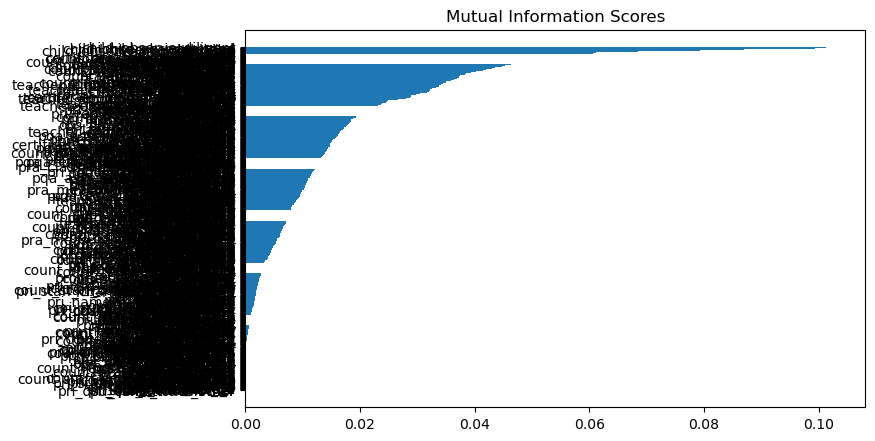

In [43]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Feature Engineering

In [44]:
X.head()

,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total,child_dob,child_zha,child_stunted,child_attends,child_attendance,child_languages,child_age_group,id_mn_best,prov_best,id_dc_best,dc_best,mn_best,ward_best,id_enumerator,id_facility,pqa_date,pqa_class_age,pqa_class_age_1,pqa_class_age_2,pqa_class_age_3,pqa_class_age_4,pqa_class_age_5,pqa_class_age_6,pqa_class_assistants,pqa_environment_areas,pqa_environment_variety,pqa_environment_appropriate,pqa_environment_accessible,pqa_environment_open,pqa_environment_outdoor,pqa_score_environment,pqa_assessment_observation,pqa_assessment_systematic,pqa_score_assessment,pqa_relationships_peers,pqa_relationships_staff,pqa_relationships_acknowledge,pqa_relationships_discipline,pqa_score_relationships,pqa_curriculum_ncf,pqa_curriculum_plan,pqa_curriculum_balance,pqa_curriculum_numeracy,pqa_curriculum_literacy,pqa_score_curriculum,pqa_teaching_choice,pqa_teaching_engagement,pqa_teaching_participation,pqa_teaching_questions,pqa_teaching_support,pqa_score_teaching,pqa_class,pra_free_play,pra_free_play_outdoor,pra_groupings,pra_groupings_1,pra_groupings_2,pra_groupings_3,pra_groupings_4,pra_groupings_5,pra_engaged,pra_agency_choice,pra_agency_explore,pra_agency_questions,pra_agency_understand,pra_agency_play,pra_agency_learn,pra_agency_order,pra_plans,pra_plans_1,pra_plans_2,pra_plans_3,pra_plans_0,pra_experience,pra_class_present,pra_date,pra_class_size,pra_class_attendance,pra_class_attendance_precovid,pra_class_size_large,pra_cohort,pra_cohort_0,pra_cohort_1,pra_cohort_2,pra_cohort_3,pra_cohort_4,pra_cohort_5,pra_cohort_6,pra_class_language,pra_plan_4yrs,pra_plan_4yrs_1,pra_plan_4yrs_2,pra_plan_4yrs_3,pra_plan_4yrs_4,pra_plan_4yrs_97,pra_plan_ncf,pra_plan_5yrs,pra_plan_5yrs_1,pra_plan_5yrs_2,pra_plan_5yrs_3,pra_plan_5yrs_4,pra_plan_5yrs_5,pra_plan_5yrs_97,pra_plan_approved,pra_plan_4yrsother,pra_plan_5yrsother,pra_job,pra_clearance_police,pra_clearance_ncp,pra_salary,pra_paid,pra_breadwinner,pra_hhsize,pra_education,pra_qualification,pra_qualification_1,pra_qualification_2,pra_qualification_3,pra_qualification_4,pra_qualification_5,pra_qualification_6,pra_qualification_7,pra_qualification_97,pra_qualification_0,pra_educationother,pra_qualificationother,pra_previous,pra_ncf_training,pra_ncf_trainer,pra_ncf_trainer_1,pra_ncf_trainer_2,pra_ncf_trainer_3,pra_ncf_trainer_4,pra_ncf_trainer_5,pra_ncf_trainer_97,pra_ncf_trainerother,pra_learnership,pra_training,pra_training_1,pra_training_2,pra_training_3,pra_training_4,pra_training_5,pra_training_6,pra_training_0,pra_special_training,pra_special_referrals,pra_online_training,pra_online_training_details,pra_motivate_support,pra_motivate_recognition,pra_motivate_mentoring,pra_shape,pra_measure_rectangle_length,pra_measure_rectangle_width,pra_class_space,pra_class_space_small,pra_class_space_large,pra_ind,pra_language,pri_mobile,pri_school,pri_holidays,pri_days,pri_time_open_hours,pri_time_open_minutes,pri_time_close_hours,pri_time_close_minutes,pri_calc_time_open,pri_calc_time_close,pri_year,pri_separate,pri_language,pri_language_1,pri_language_2,pri_language_3,pri_language_4,pri_language_5,pri_language_6,pri_language_7,pri_language_8,pri_language_9,pri_language_10,pri_language_11,pri_language_97,pri_languageother,pri_toys,pri_aftercare,pri_fees,pri_fees_amount,pri_fees_free,pri_facilities,pri_land,pri_facilitiesother,pri_landother,pri_fundingother,pri_bank,pri_transport,pri_meal,pri_meal_1,pri_meal_3,pri_meal_4,pri_meal_2,pri_registered_partial,pri_registered_programme,pri_registered_npo,pri_registered_dsd,pri_subsidy,pri_network,pri_dsd_year,pri_capacity,pri_reason_register_year,pri_attendance_usual,pri_precovid_attendance,pri_kitchen,pri_funding_6,pri_funding_7,pri_funding_donations,pri_funding_97,pri_attendance,pri_fees_exceptions,pri_fees_paid_proportion,pri

In [45]:
#With mi
num_cols = list(set(X[feature_list_mi].select_dtypes('number')))
len(num_cols)

213

In [46]:
#Without mi
#num_cols = list(set(X.select_dtypes('number')))
#len(num_cols)

In [47]:
X = X[num_cols]
X = X.fillna(0)

In [48]:
X.head()

,id_dc_n,gps_ind,pri_fees_amount_pv,pri_funding_salary_0,pra_groupings_3,pra_class_size,pri_facilities,count_staff_gender_female,practitioner,pra_agency_explore,pri_expenseother,prov_best,pri_covid_fund_applied,pri_expense_admin,pri_fees_amount_0_1,id_enumerator,pri_meal_1,obs_materials_3,pri_meals,obs_outdoor,opening_hours,pra_hhsize,pra_cohort_4,id_facility_n,language_assessment,census,pri_covid_precautions_3,count_register_gender_male,child_observe_diligent,pri_records_3,obs_equipment_2,obs_building,pri_fees_amount,quintile_used,pqa_score_assessment,pri_meal_2,pri_covid_awareness_2,pri_precovid_attendance,obs_materials_17,teacher_social_total,pri_fees_free,pri_food_type_2,pri_fees_amount_4_6,id_mn_n,certificate_registration_partial,obs_materials_10,id_ward,pri_expense_maintenance,certificate_register,child_observe_concentrated,quintile,pqa_score_teaching,count_children_present,count_staff_time_full,pri_time_open_hours,id_team,facility_type,obs_materials_16,pri_capacity,pra_groupings_4,count_staff_contract,count_staff_salary_paid,pri_records_4,pri_covid_precautions_1,obs_area_4,child_height,obs_lighting_2,obs_water,pra_breadwinner,pre_covid,count_toilets_adults,pra_plans_2,teacher_social_nonaggressive,pri_expense_materials,count_register_year_grader,pra_ind,pri_dsd_year,count_present_boys,obs_toilet_clean,count_register_year_2018,count_staff_all,pri_fees_amount_2_3,teacher_emotional_total,pri_registered_programme,pri_clinic_time,ward_best,count_children_precovid,count_register_gender,child_zha,certificate_registration_program,pri_days,pra_agency_questions,child_observe_attentive,pri_subsidy,pra_gender_nan,obs_shared,pra_previous,pra_education,pri_covid_precautions_2,obs_area_5,count_register_year_2017,grade_r,pri_registered_npo,id_mn_best,count_staff_contract_permanent,count_register_all,pri_funding_subsidy,pri_expense_food,pri_fees,pra_groupings_5,child_age,phase_natemis,pri_name_network_forum,pra_agency_play,count_register_year_2020,count_register_year_2019,pri_funding_1,child_observe_total,pri_children_4_6_years,pri_zoning,child_months_enrolment,pra_engaged,obs_area_2,count_staff_qual_skills,pri_year,pqa_class_age_4,data_year,pra_plans_1,count_register_race,obs_classrooms,pri_kitchen,obs_space,count_staff_time,obs_gate,count_children_attendance,pra_agency_learn,count_toilets_children,obs_lighting_census,count_register_year_2016,pra_class_attendance,pqa_score_environment,pra_class_attendance_precovid,count_register_gender_female,pra_plans_3,obs_materials_7,teacher_selfcare_total,count_register_race_african,pri_qualification_3,teacher_social_peers,count_staff_qual_nqf4_5,count_staff_salary,child_grant,dc_best,pra_gender_Female,pri_land,count_staff_gender,pra_measure_rectangle_width,obs_cooking_3,pri_expense_staff,obs_fence,pra_class_language,pqa_score_curriculum,pri_funding_7,id_dc_best,obs_potable,obs_area_6,obs_area_1,longitude,pri_education,child_observe_interested,pri_amount_funding_dsd,id_facility,professionals_practitioners,teacher_emotional_understand,obs_materials_5,language_child,pra_language,obs_materials_2,id_prov,obs_accessible,pri_amount_funding_fees,latitude,pra_agency_choice,obs_toilets_children,pri_location,pri_registered_partial,pqa_score_relationships,pra_qualification_3,pra_class_space,teacher_social_initiative,id_ward_n,pra_class_present,obs_materials_6,pra_agency_understand,teacher_selfcare_met,elp_ind,count_present_girls,pri_bank,id_prov_n,obs_cooking_census,obs_materials_1,obs_handwashing_3,ses_proxy,pri_registered_dsd,count_practitioners_all,certificate_registration_npo,pri_meal_3,pra_agency_order,pri_time_close_hours,obs_toilet_paper,pri_time_open_minutes,mn_best,obs_heating_census
0,134.0,1.0,0.00000,0.0,0.0,0.0,53.613797,0.0,0.0,0.0,48.779327,48.485946,0.0,0.0,0.0,20005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,44.090795,0.0,0.0,0.0,3,0.0,0.0,53.326513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,0.0,74201039.0,0.0,0.0,3,2.0,0.0,0.0,0.0,0.0,0.0,55.850092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0

In [49]:
print(X.shape, Y.shape)

(8585, 213) (8585,)


In [50]:
# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 333)

## Bayesian Optimization with LightGBM

### Number Of Trees

<IPython.core.display.Javascript object>

 10 --- MAE: -146.584 (7.813)


<IPython.core.display.Javascript object>

 50 --- MAE: -108.393 (6.348)


<IPython.core.display.Javascript object>

100 --- MAE: -102.835 (6.204)


<IPython.core.display.Javascript object>

500 --- MAE: -102.692 (5.891)


<IPython.core.display.Javascript object>

1000 --- MAE: -105.310 (5.781)


<IPython.core.display.Javascript object>

2000 --- MAE: -107.250 (5.727)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

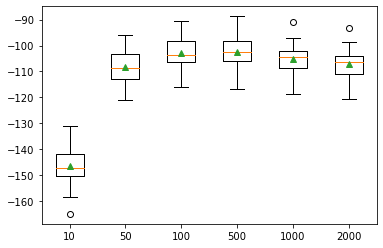

In [51]:
from sklearn.model_selection import RepeatedKFold
trees = [10, 50, 100, 500, 1000, 2000]

results = []
names = []
for i in trees:
    
    params = {
        'n_estimators': i,
    }
    
    cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(lgb.LGBMRegressor(**params), X_train, y_train, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = -1)
    results.append(scores)
    names.append(i)
    print('%3d --- MAE: %.3f (%.3f)' % (i, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels = names, showmeans = True)
plt.show()

### Tree Depth

<IPython.core.display.Javascript object>

  1 --- MAE: -137.327 (7.604)


<IPython.core.display.Javascript object>

  2 --- MAE: -126.644 (7.080)


<IPython.core.display.Javascript object>

  3 --- MAE: -118.164 (7.121)


<IPython.core.display.Javascript object>

  4 --- MAE: -111.116 (7.026)


<IPython.core.display.Javascript object>

  5 --- MAE: -106.942 (6.565)


<IPython.core.display.Javascript object>

  6 --- MAE: -104.442 (6.174)


<IPython.core.display.Javascript object>

  7 --- MAE: -103.630 (6.436)


<IPython.core.display.Javascript object>

  8 --- MAE: -104.479 (6.059)


<IPython.core.display.Javascript object>

  9 --- MAE: -104.931 (6.270)


<IPython.core.display.Javascript object>

 10 --- MAE: -105.102 (5.853)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

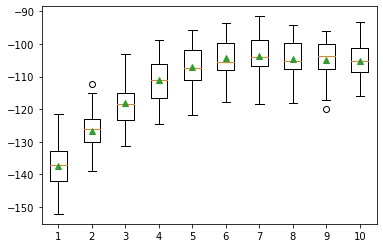

In [52]:
results = []
names = []
for i in range(1, 11):
    
    params = {
        'max_depth': i,
        'num_leaves': 2**i,
    }
    
    cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(lgb.LGBMRegressor(**params), X_train, y_train, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = -1)
    results.append(scores)
    names.append(i)
    print('%3d --- MAE: %.3f (%.3f)' % (i, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels = names, showmeans = True)
plt.show()

## Learning Rates

<IPython.core.display.Javascript object>

0.010 --- MAE: -147.549 (7.740)


<IPython.core.display.Javascript object>

0.020 --- MAE: -126.557 (7.237)


<IPython.core.display.Javascript object>

0.030 --- MAE: -116.769 (7.042)


<IPython.core.display.Javascript object>

0.040 --- MAE: -110.980 (6.796)


<IPython.core.display.Javascript object>

0.050 --- MAE: -107.768 (6.254)


<IPython.core.display.Javascript object>

0.060 --- MAE: -105.883 (6.620)


<IPython.core.display.Javascript object>

0.070 --- MAE: -104.470 (6.615)


<IPython.core.display.Javascript object>

0.080 --- MAE: -103.332 (6.337)


<IPython.core.display.Javascript object>

0.090 --- MAE: -102.924 (6.225)


<IPython.core.display.Javascript object>

0.100 --- MAE: -102.835 (6.204)


<IPython.core.display.Javascript object>

0.110 --- MAE: -102.168 (6.436)


<IPython.core.display.Javascript object>

0.120 --- MAE: -101.968 (6.376)


<IPython.core.display.Javascript object>

0.130 --- MAE: -101.746 (6.433)


<IPython.core.display.Javascript object>

0.140 --- MAE: -102.345 (6.531)


<IPython.core.display.Javascript object>

0.150 --- MAE: -102.247 (6.312)


<IPython.core.display.Javascript object>

0.160 --- MAE: -102.256 (6.281)


<IPython.core.display.Javascript object>

0.170 --- MAE: -102.708 (6.480)


<IPython.core.display.Javascript object>

0.180 --- MAE: -102.396 (6.332)


<IPython.core.display.Javascript object>

0.190 --- MAE: -103.197 (6.075)


<IPython.core.display.Javascript object>

0.200 --- MAE: -103.372 (6.455)


<IPython.core.display.Javascript object>

0.210 --- MAE: -104.056 (5.872)


<IPython.core.display.Javascript object>

0.220 --- MAE: -104.904 (6.411)


<IPython.core.display.Javascript object>

0.230 --- MAE: -105.344 (6.198)


<IPython.core.display.Javascript object>

0.240 --- MAE: -105.137 (6.542)


<IPython.core.display.Javascript object>

0.250 --- MAE: -104.633 (7.116)


<IPython.core.display.Javascript object>

0.260 --- MAE: -106.642 (6.705)


<IPython.core.display.Javascript object>

0.270 --- MAE: -107.304 (6.374)


<IPython.core.display.Javascript object>

0.280 --- MAE: -107.343 (6.599)


<IPython.core.display.Javascript object>

0.290 --- MAE: -108.489 (6.498)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

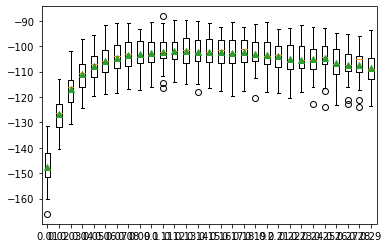

In [53]:
rates = list(range(1,30))
rates = [float(X/100) for X in rates]

results = []
names = []
for i in rates:
    
    params = {
        'learning_rate': i,
    }
    
    cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(lgb.LGBMRegressor(**params), X_train, y_train, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = -1)
    results.append(scores)
    names.append(i)
    print('%.3f --- MAE: %.3f (%.3f)' % (i, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels = names, showmeans = True)
plt.show()

## Boosting Types

<IPython.core.display.Javascript object>

gbdt --- MAE: -102.835 (6.204)


<IPython.core.display.Javascript object>

dart --- MAE: -137.880 (7.612)


<IPython.core.display.Javascript object>

goss --- MAE: -109.982 (6.596)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

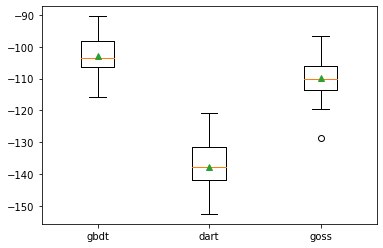

In [54]:
types = ['gbdt', 'dart', 'goss']

results = []
names = []
for i in types:
    
    params = {
        'boosting_type': i,
    }
    
    cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(lgb.LGBMRegressor(**params), X_train, y_train, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = -1)
    results.append(scores)
    names.append(i)
    print('%s --- MAE: %.3f (%.3f)' % (i, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels = names, showmeans = True)
plt.show()

In [55]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'rmse',
         'learning_rate': 0.05, 
         'num_iterations': 7500,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.8,
         'bagging_freq': 1,
         'feature_fraction': 0.8
         }

clf = lgb.train(params=param, 
                early_stopping_rounds=100,
                verbose_eval=500,
                train_set=train_data,
                valid_sets=[test_data])

y_pred = clf.predict(X_test) 

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7472
[LightGBM] [Info] Number of data points in the train set: 6868, number of used features: 213
[LightGBM] [Info] Start training from score 48.703887
Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 9.6287
Early stopping, best iteration is:
[418]	valid_0's rmse: 9.61698


In [56]:
Xtest  = test[num_cols]

In [57]:
%%time
errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)
    
    clf = lgb.train(params=param, 
                     early_stopping_rounds=200,
                     verbose_eval=500,
                     train_set=train_data,
                     valid_sets=[test_data])

    y_pred = clf.predict(X_test) 

    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    
    errlgb.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    p = clf.predict(Xtest)
    
    y_pred_totlgb.append(p)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7612
[LightGBM] [Info] Number of data points in the train set: 7726, number of used features: 213
[LightGBM] [Info] Start training from score 48.757313
Training until validation scores don't improve for 200 rounds
[500]	valid_0's rmse: 9.56957
Early stopping, best iteration is:
[421]	valid_0's rmse: 9.55884
RMSE:  9.558844153762402
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7610
[LightGBM] [Info] Number of data points in the train set: 7726, number of used features: 213
[LightGBM] [Info] Start training from score 48.608999
Training until validation scores don't improve for 200 rounds
[500]	valid_0's rmse: 9.74314
Early stopping, best iteration is:

In [62]:
np.mean(errlgb, 0)

9.726412423231446

In [58]:
%%time
# Get the top fifteen features for each predictions
top_predictors = []
for i in range(test.shape[0]):
  predictors = eli5.explain_prediction_df(estimator=clf, doc=test[num_cols].fillna(0).iloc[i], top = 15)
  top_predictors.append(predictors.feature.tolist())

CPU times: total: 2h 23min 6s
Wall time: 1h 2min 51s


In [59]:
ypred = np.mean(y_pred_totlgb,0)

In [60]:
# Submission file preparation
predictors = pd.DataFrame(top_predictors, columns = ['feature_' + str(i) for i in range(1,16)])
predictors['target'] = ypred
predictors['child_id'] = test2.child_id
predictors = predictors[ss.columns.tolist()]
predictors.head()

,child_id,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,ID_0I0999N6S,62.087379,<BIAS>,child_observe_total,teacher_emotional_total,id_mn_best,child_observe_attentive,child_observe_diligent,teacher_social_total,count_staff_qual_skills,count_toilets_children,pri_fees_amount_pv,pri_registered_partial,prov_best,child_height,count_register_year_2020,child_age
1,ID_GQ6ONJ4FP,46.092832,<BIAS>,child_observe_total,teacher_emotional_total,pri_fees_amount_pv,child_observe_concentrated,child_observe_attentive,child_observe_diligent,id_mn_n,child_zha,id_prov_n,longitude,prov_best,mn_best,id_mn_best,child_age
2,ID_YZ76CVRW3,49.878179,<BIAS>,id_mn_best,id_enumerator,child_observe_total,child_observe_diligent,pri_fees_amount_pv,id_team,longitude,child_observe_interested,id_facility_n,count_register_all,pri_fees_amount_4_6,child_age,child_zha,teacher_emotional_total
3,ID_BNINCRXH8,69.649087,<BIAS>,child_observe_total,id_enumerator,child_observe_concentrated,prov_best,id_mn_best,child_observe_attentive,child_age,mn_best,longitude,child_observe_diligent,teacher_emotional_total,language_assessment,child_height,id_facility
4,ID_1U7GDTLRI,43.892940,<BIAS>,child_observe_total,mn_best,id_facility,latitude,longitude,child_observe_concentrated,child_observe_diligent,count_register_year_2016,pri_time_open_hours,pri_fees_amount_pv,id_enumerator,teacher_emotional_total,id_mn_best,child_age


In [61]:
# Create csv to upload to Zindi for scoring
predictors.to_csv('Submissions/LGBMBaseSol.csv', index = False)